In [ ]:
from vpython import *

ball = sphere(pos=vector(-5,0,0), radius=0.5,color=color.cyan)
wallR = box(pos=vector(6,0,0), size=vector(0.2,12,12), color=color.green)
ball.velocity = vector(25,0,0)
deltat = 0.005
t = 0
ball.pos = ball.pos + ball.velocity*deltat
while t < 3:
    rate(100)
    if ball.pos.x > wallR.pos.x:
        ball.velocity.x = -ball.velocity.x
    ball.pos = ball.pos + ball.velocity*deltat
    t = t + deltat 

[Image1]: ./Images/Spring-Pendulum.png "Problem diagram"

# Spring - Pendulum

![Problem diagram][Image1]


### Lagrangian Function

Taking the roof as the zero of gravitational potential ($V_{g} = 0$), we that the gravitational potential energy $V_{g}$ takes the form:

$$ V_{g} = - m g (L_{0} + L) \cos{\theta} $$

Where $L$ is the spring's elongation and $L_{0}$ is the spring's own length. Furthermore, the elastic energy $V_{k}$ associated with the spring's elongation takes the form:

$$ V_{k} = \frac{1}{2} k L^{2} $$

Moreover, the kinetic energy $T$ is:

$$ T = \frac{1}{2} m \left(\dot{r}^{2} + r^{2} \dot{\theta}^{2} \right) = \frac{1}{2} m \; \left( \dot{L}^{2} + (L_{0} + L)^{2} \dot{\theta}^{2} \right)$$

Where we have considered that $r = L_{0} + L$, so $\dot{r} = \dot{L} $. Then, the Lagrangian finally takes the form:

$$ \mathscr{L} = T - V = T - V_{g} - V_{k} = \frac{1}{2} m \; \left( \dot{L}^{2} + (L_{0} + L)^{2} \dot{\theta}^{2} \right) + m g (L_{0} + L) \cos{\theta} - \frac{1}{2} k L^{2} $$

### Equations of motion

Then the equations of motion are:

$$\frac{d}{dt} \left( \frac{\partial \mathscr{L}}{\partial \dot{L}} \right) - \frac{\partial \mathscr{L}}{\partial L} = 0 \quad \implies \quad \ddot{L} = (L_{0} + L) \dot{\theta}^{2} + g \cos{\theta} - \frac{k}{m} L$$

$$\frac{d}{dt} \left( \frac{\partial \mathscr{L}}{\partial \dot{\theta}} \right) - \frac{\partial \mathscr{L}}{\partial \theta} = 0 \quad \implies \quad \ddot{\theta} = - \frac{1}{(L_{0} + L)} \left[ \; g \sin{\theta} + 2 \dot{L} \dot{\theta} \; \right]$$

### Solve the system numerically

As a first approach, we will try to solve the system numerically. To make it, we have to reduce the order of the differential equations, changing from two differential equations of second order to four differential equations of first order.

Let:

$$ v = \dot{L} $$

$$ \omega = \dot{\theta} $$

So:

$$ \dot{L} = f_{1} (L, \theta, v, \omega, \mathrm{params}) = v $$

$$ \dot{\theta} = f_{2} (L, \theta, v, \omega, \mathrm{params}) = \omega$$

$$ \dot{v} = f_{3} (L, \theta, v, \omega, \mathrm{params}) = (L_{0} + L) \omega^{2} + g \cos{\theta} - \frac{k}{m} L $$

$$ \dot{\omega} = f_{4} (L, \theta, v, \omega, \mathrm{params}) = - \frac{1}{(L_{0} + L)} \left[ \; g \sin{\theta} + 2 v \omega \; \right] $$

Where we are working in space $( \; L \; , \; \theta \; , \; v \; , \; \omega \; )$ and $ \mathrm{params} = [ m, g, k, L_{0}]$

In order to plot real motion of the mass, take into account that:

$$ x = (L_{0} + L) \sin{\theta}$$

$$ y = - (L_{0} + L) \cos{\theta}$$

In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal

In [40]:
# Functions for solving differential equations and to define fluxes in phase portrait

def f1(L, theta, v, omega, m, g, k, Lo):
    return v

def f2(L, theta, v, omega, m, g, k, Lo):
    return omega

def f3(L, theta, v, omega, m, g, k, Lo):
    return (Lo + L) * omega**2 + g * np.cos(theta) - k/m * L

def f4(L, theta, v, omega, m, g, k, Lo):
    return - (g * np.sin(theta) + 2.0 * v * omega) / (Lo + L)

def dydt(y, t, m, g, k, Lo):
    
    L, theta, v, omega = y
    
    dL = f1(L, theta, v, omega, m, g, k, Lo)
    dtheta = f2(L, theta, v, omega, m, g, k, Lo)
    dv = f3(L, theta, v, omega, m, g, k, Lo)
    domega = f4(L, theta, v, omega, m, g, k, Lo)
    
    return [dL, dtheta, dv, domega]

Let's intend to search some interresting dynamic regime in the system, trying out with some values for the system's parameters

In [41]:
# Constant parameters
m = 0.2
g = 9.8
k = 3.5
Lo = 1

# Initial conditions
L0 = Lo
v0 = 0.
theta0 =  0.3
omega0 =  0.

y0 = [L0, theta0, v0, omega0]

# Time
ti = 0
tf = 25
Nt = 1000

t, timestep = np.linspace(ti, tf , Nt, retstep=True)

print('time step = {}'.format(timestep))

# Solve differential equations
sol = odeint(dydt, y0, t, args=(m, g, k, Lo))

# Retrieve variales information 
L = sol[:, 0]
theta = sol[:, 1]
v = sol[:, 2]
omega = sol[:, 3]

# Retrieve (x,y) positions
x = (Lo + L) * np.sin(theta)
y = -(Lo + L) * np.cos(theta)

time step = 0.025025025025025027


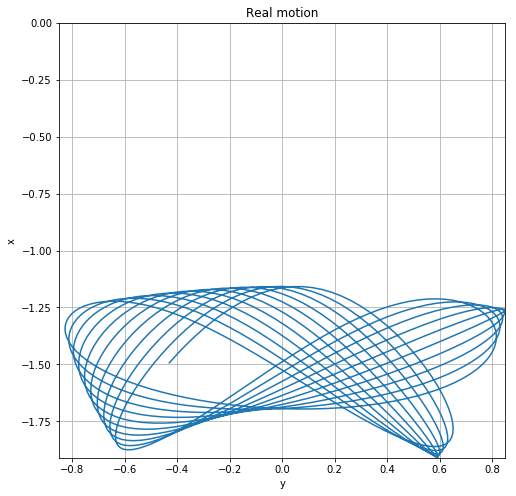

In [42]:
# Plot positions

plt.close()
plt.figure(figsize=(8,8))
plt.plot(x, y,"-")
plt.xlabel('y')
plt.ylabel('x')
plt.title('Real motion')
plt.axis([-np.abs(x).max(), np.abs(x).max(), -np.abs(y).max(), 0]) # plt.axis([xmin, xmax, ymin, ymax])
plt.grid()
plt.show()

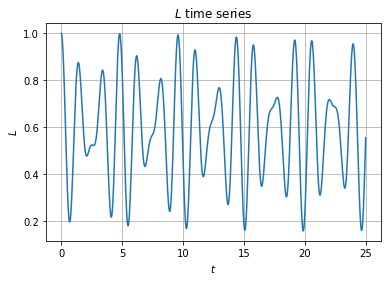

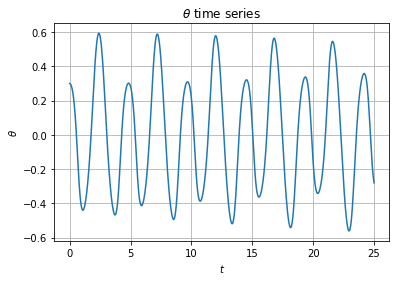

In [43]:
# Plot time series

plt.close()
plt.title(r'$L$ time series')
plt.plot(t, L,"-")
plt.xlabel(r'$t$')
plt.ylabel(r'$L$')
plt.grid()
plt.show()

plt.close()
plt.title(r'$\theta$ time series')
plt.plot(t, theta,"-")
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.grid()
plt.show()

Nyquist frecuency = 19.98


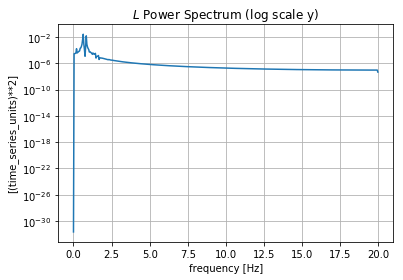

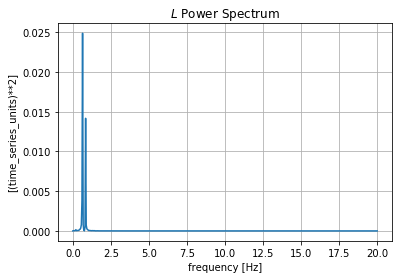

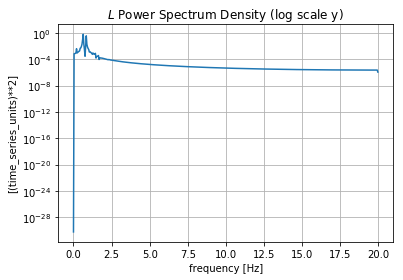

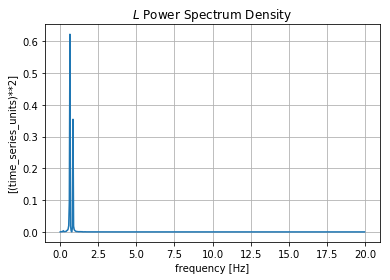

In [44]:
# Power spectrum and Power spectrum density for L time series.

time_series = L
# fourier = np.fft.fft(time_series)
# n = time_series.size

print('Nyquist frecuency = {}'.format(1./(2.*timestep)))

plt.close()
f, Pxx = signal.periodogram(time_series, 1./timestep, scaling='spectrum')
plt.semilogy(f, Pxx)
plt.title(r'$L$ Power Spectrum (log scale y)')
plt.xlabel('frequency [Hz]')
plt.ylabel('[(time_series_units)**2]')
plt.grid()
plt.show()

plt.close()
f, Pxx = signal.periodogram(time_series, 1./timestep, scaling='spectrum')
plt.plot(f, Pxx,'-')
plt.title(r'$L$ Power Spectrum')
plt.xlabel('frequency [Hz]')
plt.ylabel('[(time_series_units)**2]')
plt.grid()
plt.show()

plt.close()
f, Pxx_den = signal.periodogram(time_series, 1./timestep, scaling='density')
plt.semilogy(f, Pxx_den)
plt.title(r'$L$ Power Spectrum Density (log scale y)')
plt.xlabel('frequency [Hz]')
plt.ylabel('[(time_series_units)**2]')
plt.grid()
plt.show()

plt.close()
f, Pxx_den = signal.periodogram(time_series, 1./timestep, scaling='density')
plt.plot(f, Pxx_den, '-')
plt.title(r'$L$ Power Spectrum Density')
plt.xlabel('frequency [Hz]')
plt.ylabel('[(time_series_units)**2]')
plt.grid()
plt.show()

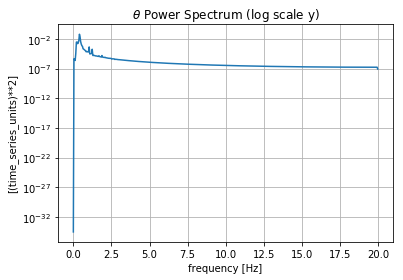

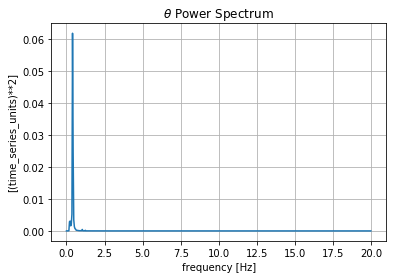

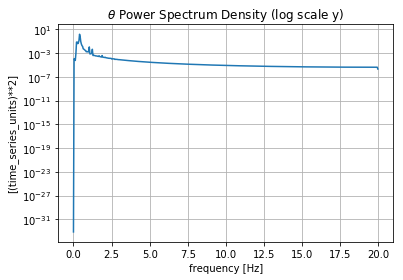

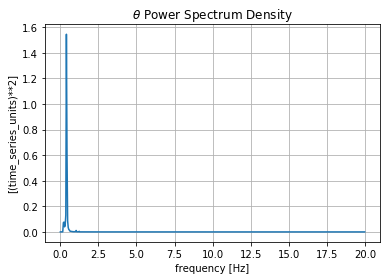

In [45]:
# Power spectrum and Power spectrum density for THETA time series.

time_series = theta

plt.close()
f, Pxx = signal.periodogram(time_series, 1./timestep, scaling='spectrum')
plt.semilogy(f, Pxx)
plt.title(r'$\theta$ Power Spectrum (log scale y)')
plt.xlabel('frequency [Hz]')
plt.ylabel('[(time_series_units)**2]')
plt.grid()
plt.show()

plt.close()
f, Pxx = signal.periodogram(time_series, 1./timestep, scaling='spectrum')
plt.plot(f, Pxx, '-')
plt.title(r'$\theta$ Power Spectrum')
plt.xlabel('frequency [Hz]')
plt.ylabel('[(time_series_units)**2]')
plt.grid()
plt.show()

plt.close()
f, Pxx_den = signal.periodogram(time_series, 1./timestep, scaling='density')
plt.semilogy(f, Pxx_den)
plt.title(r'$\theta$ Power Spectrum Density (log scale y)')
plt.xlabel('frequency [Hz]')
plt.ylabel('[(time_series_units)**2]')
plt.grid()
plt.show()

plt.close()
f, Pxx_den = signal.periodogram(time_series, 1./timestep, scaling='density')
plt.plot(f, Pxx_den, '-')
plt.title(r'$\theta$ Power Spectrum Density')
plt.xlabel('frequency [Hz]')
plt.ylabel('[(time_series_units)**2]')
plt.grid()
plt.show()

In [46]:
print('Frecuencies length = {} \nSpectrum length = {}\n'.format(len(f), len(Pxx)))

Pxx_max_index = np.argmax(Pxx)
f_max = f[Pxx_max_index]
print('Maximum frecuency = {}\nCorresponding period = {}\n'.format(f_max, 1./f_max))

f2 = np.hstack((f[0:Pxx_max_index], f[Pxx_max_index+1:]))
Pxx2 = np.hstack((Pxx[0:Pxx_max_index], Pxx[Pxx_max_index+1:]))
Pxx2_max_index = np.argmax(Pxx2)
f2_max = f2[Pxx2_max_index]
print('Second maximum frecuency = {}\nCorresponding period = {}\n'.format(f2_max, 1./f2_max))

f3 = np.hstack((f2[0:Pxx2_max_index], f2[Pxx2_max_index+1:]))
Pxx3 = np.hstack((Pxx2[0:Pxx2_max_index], Pxx2[Pxx2_max_index+1:]))
Pxx3_max_index = np.argmax(Pxx3)
f3_max = f3[Pxx3_max_index]
print('Third maximum frecuency = {}\nCorresponding period = {}\n'.format(f3_max, 1./f3_max))

f4 = np.hstack((f3[0:Pxx3_max_index], f3[Pxx3_max_index+1:]))
Pxx4 = np.hstack((Pxx3[0:Pxx3_max_index], Pxx3[Pxx3_max_index+1:]))
Pxx4_max_index = np.argmax(Pxx4)
f4_max = f4[Pxx4_max_index]
print('Fourth maximum frecuency = {}\nCorresponding period = {}\n'.format(f4_max, 1./f4_max))

Frecuencies length = 501 
Spectrum length = 501

Maximum frecuency = 0.3996
Corresponding period = 2.5025025025025025

Second maximum frecuency = 0.43956
Corresponding period = 2.275002275002275

Third maximum frecuency = 0.35964
Corresponding period = 2.7805583361138915

Fourth maximum frecuency = 0.47952000000000006
Corresponding period = 2.0854187520854186



### Disccussion

It seems we have only found periodic regime. If we still trying out with different values for **ALL** the parameters, it will require a huge effort. So we need an smarter method to perform it, and the very best way is first to nondimensionalize the system.

### Dimensionless system

The system an be rewritten as:

$$\frac{\mathrm{d}^{2}x}{\mathrm{d}\tau^{2}} = x \; \left( \frac{\mathrm{d}\theta}{\mathrm{d}\tau} \right)^{2} + \cos{\theta} - \gamma \left( 1 - x \right) $$

$$\frac{\mathrm{d}^{2} \theta}{\mathrm{d}\tau^{2}} = - \frac{\sin{\theta}}{x} - \frac{2}{x} \frac{\mathrm{d} x}{\mathrm{d} \tau} \frac{\mathrm{d} \theta}{\mathrm{d} \tau} $$

Let:

$$ v_{ad} = \frac{\mathrm{d}x}{\mathrm{d} \tau} $$

$$ \omega = \frac{\mathrm{d}\theta}{\mathrm{d} \tau} $$

So:

$$ \frac{\mathrm{d}x}{\mathrm{d} \tau} = F_{1} (x, \theta, v_{ad}, \omega, \gamma) = v_{ad} $$

$$ \frac{\mathrm{d}\theta}{\mathrm{d} \tau} = F_{2} (x, \theta, v_{ad}, \omega, \gamma) = \omega$$

$$ \frac{\mathrm{d}v_{ad}}{\mathrm{d} \tau} = F_{3} (x, \theta, v_{ad}, \omega, \gamma) =  x \; \omega^{2} + \cos{\theta} + \gamma \left( 1 - x \right) $$

$$ \frac{\mathrm{d}\omega}{\mathrm{d} \tau} = F_{4} (x, \theta, v_{ad}, \omega, \gamma) = - \frac{\sin{\theta}}{x} - \frac{2 \; v_{ad} \; \omega}{x}  $$

Now we are working in space $( \; x \; , \; \theta \; , \; v_{ad} \; , \; \omega \; )$ and the only param is $\gamma$

In order to plot real motion of the mass, take into account that:

$$ x_{real} = L_{0} \; x \; \sin{\theta}$$

$$ y_{real} = - L_{0} \; x \; \cos{\theta}$$


The Jacobian of the system is:

$ J = \begin{pmatrix}
  0 & 0 & 1 & 0 \\
  0 & 0 & 0 & 1 \\
  \omega^{2} - \gamma & -\sin{\theta} & 0 & 2 x \\
  \frac{1}{x^{2}} \left( \sin{\theta} + 2 \; v_{ad} \; \omega \right) 
  & - \frac{\cos{\theta}}{x} & - \frac{2 \omega}{x} & - \frac{2 \; v_{ad}}{x}
 \end{pmatrix} $

  $ J_{1} = \begin{pmatrix}
  0 & 0 & 1 & 0 \\
  0 & 0 & 0 & 1 \\
  -\gamma & 0 & 0 & 2 \frac{\gamma + 1}{\gamma} \\
  0 & - \frac{1}{x} & 0 & 0
 \end{pmatrix} $
 
  $ J_{1} = \begin{pmatrix}
  0 & 0 & 1 & 0 \\
  0 & 0 & 0 & 1 \\
  -\gamma & 0 & 0 & 2 \frac{\gamma - 1}{\gamma} \\
  0 & \frac{1}{x} & 0 & 0
 \end{pmatrix} $

In [5]:
from sympy.solvers import solve, nonlinsolve
from sympy import Symbol, symbols
from sympy import sin, cos, limit
from mpmath import *

Here we search for a solution of equation $x^{2} == 1$ such that x is in the interval $[0.5, 3]$.

In [4]:
x = Symbol('x')
eq = x**2 - 1
solve([x >= 0.5, x <= 3, eq ], x)

Eq(x, 1.00000000000000)

In [33]:
x, theta, gamma = symbols('x, theta, gamma', real=True)

eq1 = sin(theta)/x

solve(eq1, [x, theta])

[{theta: 0}, {theta: pi}]

In [34]:
# theta = 0 --> cos(0) = 1
eq2 = 1 + gamma * (1 - x)

# theta = pi --> cos(pi) = -1
eq3 = -1 + gamma * (1 - x)


print(solve(eq2, [x, gamma]))
print('\n')
print(solve(eq3, [x, gamma]))

[{x: (gamma + 1)/gamma}]


[{x: (gamma - 1)/gamma}]


In [2]:
# Functions for solving differential equations and to define fluxes in phase portrait

def F1(x, theta, Vad, omega, gamma):
    return Vad

def F2(x, theta, Vad, omega, gamma):
    return omega

def F3(x, theta, Vad, omega, gamma):
    return x * omega**2 + np.cos(theta) + gamma * (1 - x)

def F4(x, theta, Vad, omega, gamma):
    return - ( np.sin(theta) + 2.0 * Vad * omega) / x

def dYdtau(y, tau, gamma):
    
    x, theta, Vad, omega = y
    
    dx = F1(x, theta, Vad, omega, gamma)
    dtheta = F2(x, theta, Vad, omega, gamma)
    dVad = F3(x, theta, Vad, omega, gamma)
    domega = F4(x, theta, Vad, omega, gamma)
    
    return [dx, dtheta, dVad, domega]

In [ ]:
# Constant parameters
gamma = 10
Lo = 1

# Initial conditions
x0 = Lo
Vad0 = 0.
theta0 =  0.3
omega0 =  0.

y0 = [x0, theta0, Vad0, omega0]

# Time
tau_i = 0
tau_f = 100
Ntau = 4000

tau, tau_step = np.linspace(tau_i, tau_f , Ntau, retstep=True)

print('tau time step = {}'.format(tau_step))

# Solve differential equations
sol = odeint(dYdtau, y0, tau, args=(gamma,))

# Retrieve variales information 
x = sol[:, 0]
theta = sol[:, 1]
Vad = sol[:, 2]
omega = sol[:, 3]

# Retrieve (x,y) positions
xReal = Lo * x * np.sin(theta)
yReal = - Lo * x * np.cos(theta)

# Plot positions

plt.close()
plt.figure(figsize=(8,8))
plt.plot(xReal, yReal,"-")
plt.xlabel('y')
plt.ylabel('x')
plt.title('Real motion')
plt.axis([-np.abs(xReal).max(), np.abs(xReal).max(), -np.abs(yReal).max(), 0]) # plt.axis([xmin, xmax, ymin, ymax])
plt.grid()
plt.show()

tau time step = 0.025003125390673835


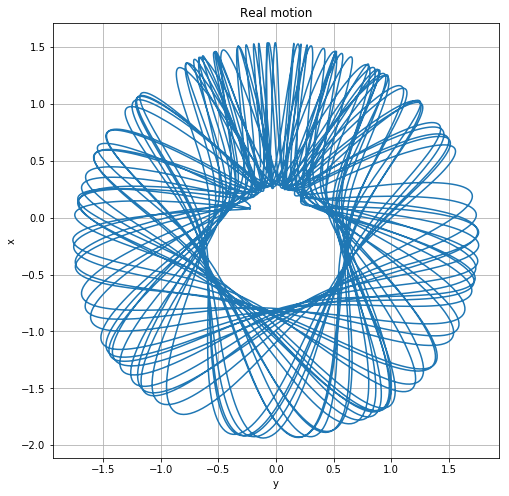

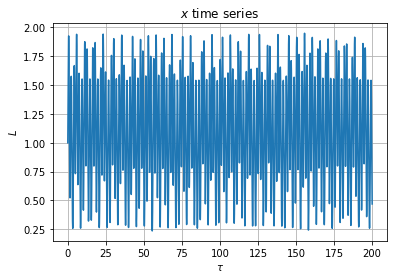

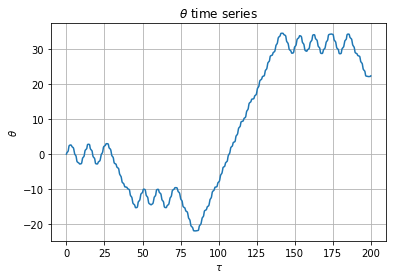

In [66]:
# Constant parameters
gamma = 10.
Lo = 1

# Initial conditions
x0 = Lo
Vad0 = 2.
theta0 =  0.0
omega0 =  2.

y0 = [x0, theta0, Vad0, omega0]

# Time
tau_i = 0
tau_f = 200
Ntau = 8000

tau, tau_step = np.linspace(tau_i, tau_f , Ntau, retstep=True)

print('tau time step = {}'.format(tau_step))

# Solve differential equations
sol = odeint(dYdtau, y0, tau, args=(gamma,))

# Retrieve variales information 
x = sol[:, 0]
theta = sol[:, 1]
Vad = sol[:, 2]
omega = sol[:, 3]

# Retrieve (x,y) positions
xReal = Lo * x * np.sin(theta)
yReal = - Lo * x * np.cos(theta)

# Plot positions

plt.close()
plt.figure(figsize=(8,8))
plt.plot(xReal, yReal,"-")
plt.xlabel('y')
plt.ylabel('x')
plt.title('Real motion')
#plt.axis([-np.abs(xReal).max(), np.abs(xReal).max(), -np.abs(yReal).max(), 0]) # plt.axis([xmin, xmax, ymin, ymax])
plt.grid()
plt.show()

# Plot time series

plt.close()
plt.title(r'$x$ time series')
plt.plot(tau, x,"-")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$L$')
plt.grid()
plt.show()

plt.close()
plt.title(r'$\theta$ time series')
plt.plot(tau, theta,"-")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\theta$')
plt.grid()
plt.show()

tau time step = 0.025003125390673835


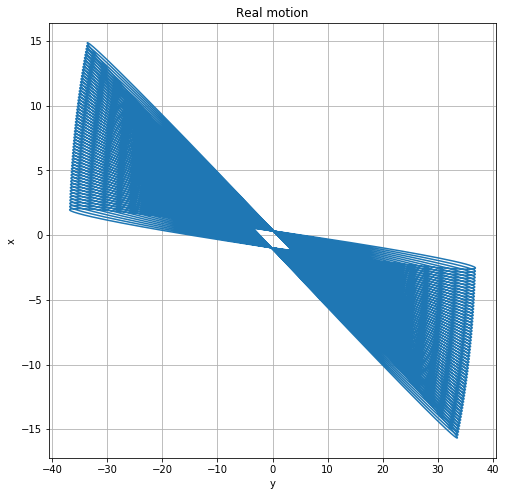

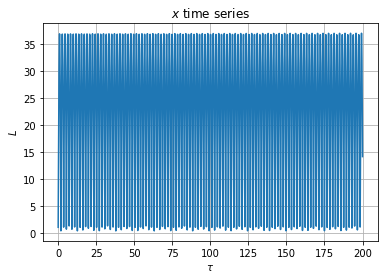

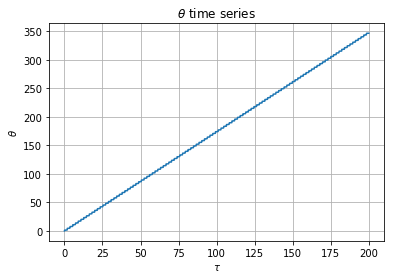

In [120]:
# Constant parameters
gamma = np.pi
Lo = 1.

# Initial conditions
x0 = Lo
Vad0 = 10.
theta0 =  0.1
omega0 =  20*np.pi

y0 = [x0, theta0, Vad0, omega0]

# Time
tau_i = 0
tau_f = 200
Ntau = 8000

tau, tau_step = np.linspace(tau_i, tau_f , Ntau, retstep=True)

print('tau time step = {}'.format(tau_step))

# Solve differential equations
sol = odeint(dYdtau, y0, tau, args=(gamma,))

# Retrieve variales information 
x = sol[:, 0]
theta = sol[:, 1]
Vad = sol[:, 2]
omega = sol[:, 3]

# Retrieve (x,y) positions
xReal = Lo * x * np.sin(theta)
yReal = - Lo * x * np.cos(theta)

# Plot positions

plt.close()
plt.figure(figsize=(8,8))
plt.plot(xReal, yReal,"-")
plt.xlabel('y')
plt.ylabel('x')
plt.title('Real motion')
#plt.axis([-np.abs(xReal).max(), np.abs(xReal).max(), -np.abs(yReal).max(), 0]) # plt.axis([xmin, xmax, ymin, ymax])
plt.grid()
plt.show()

# Plot time series

plt.close()
plt.title(r'$x$ time series')
plt.plot(tau, x,"-")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$L$')
plt.grid()
plt.show()

plt.close()
plt.title(r'$\theta$ time series')
plt.plot(tau, theta,"-")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\theta$')
plt.grid()
plt.show()